# Envirionment

In [1]:
import os
import io
import time
import requests
import zipfile
import torch
import numpy as np
import matplotlib.pyplot as plt

from dataset import acpds
from utils import transforms as tran
from utils import visualize as vis
from utils import roi_analysis as ra
from models.utils import pooling

# set device and confirm set to GPU (cuda)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
# Adjust CWD
directory = os.getcwd().replace('\\notebooks', '')
os.chdir(directory)

In [3]:
# Download and store ACPDS
# Alternatively, you can manually download 'data' from README.md and upload 'data' under the 'dataset' folder to circumvent this if statement
if not os.path.exists('dataset/data'): 
    r = requests.get("https://pub-e8bbdcbe8f6243b2a9933704a9b1d8bc.r2.dev/parking%2Frois_gopro.zip")
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('dataset/data')

In [4]:
train_ds, valid_ds, test_ds = acpds.create_datasets('dataset/data') # create training, validation, and test splits
image_batch, rois_batch, labels_batch = next(iter(valid_ds)) # retrieve next batch of data from validation set
image_raw, rois, labels = image_batch[0], rois_batch[0], labels_batch[0] # select first observation in batch

This notebook serves as a playground to trial and visualize the augmentation functions defined in transforms.py

# Input Image

## Annotated

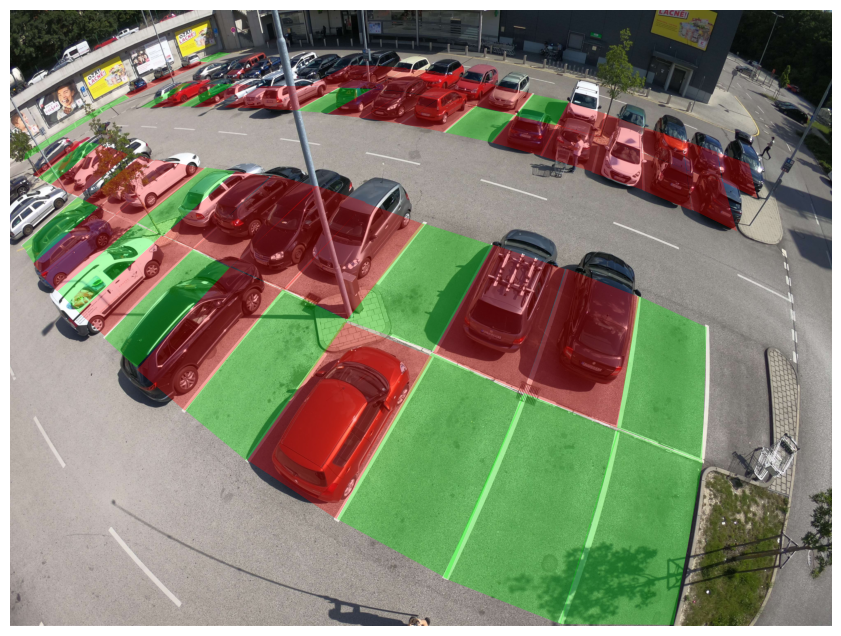

In [5]:
image = tran.preprocess(image_raw, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image, rois, labels, show=True) # output annotated image

## Unannotated

Revisit and run this cell after applying augmentations to visualize augemented input image without labels.

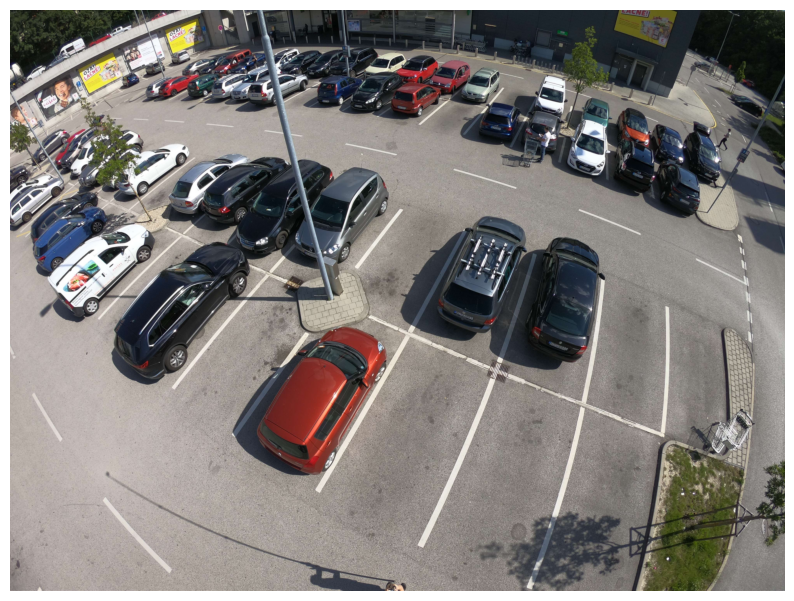

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(vis.image_pt_to_np(image))
plt.axis('off')
plt.show()

# Augmentation Playground

## Baseline

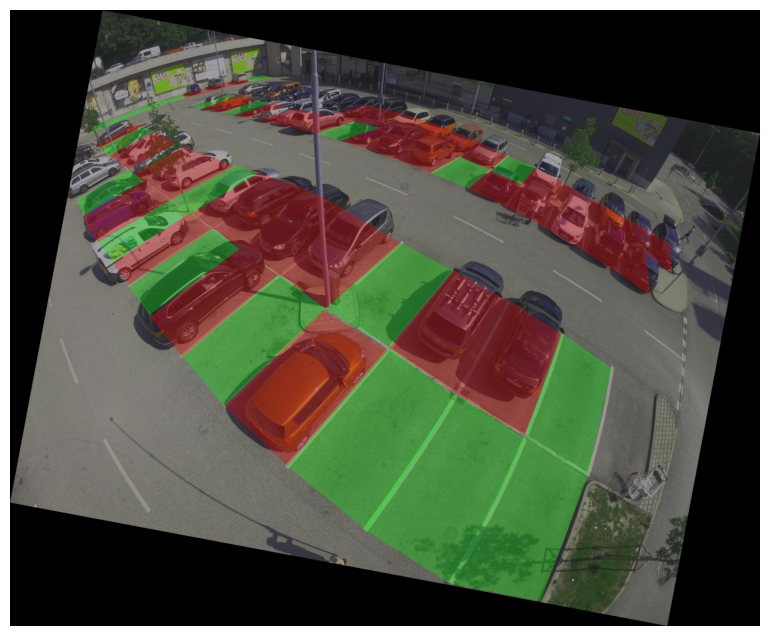

In [7]:
np.random.seed(99)
image_aug, rois_aug = tran.augment(image_raw, rois) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

## Random Erasing

### Random

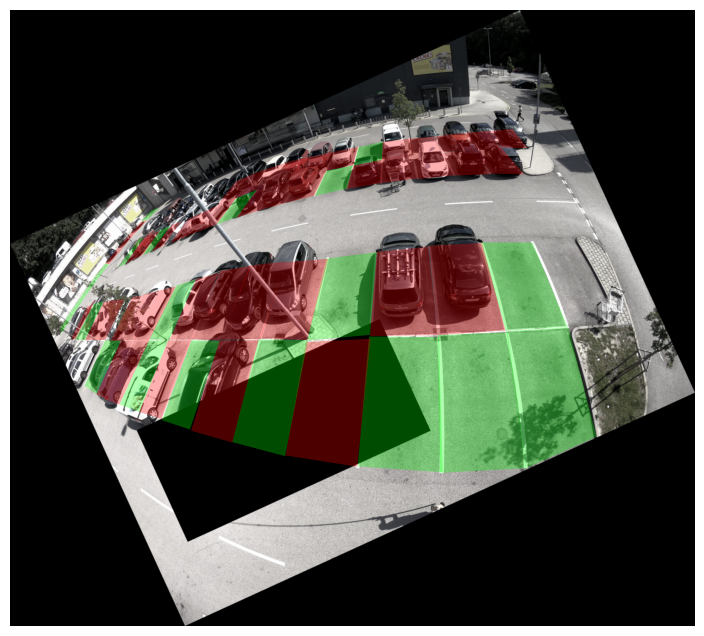

In [8]:
np.random.seed(99)
image_aug, rois_aug = tran.random_erase(image_raw, rois) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

### Proportional

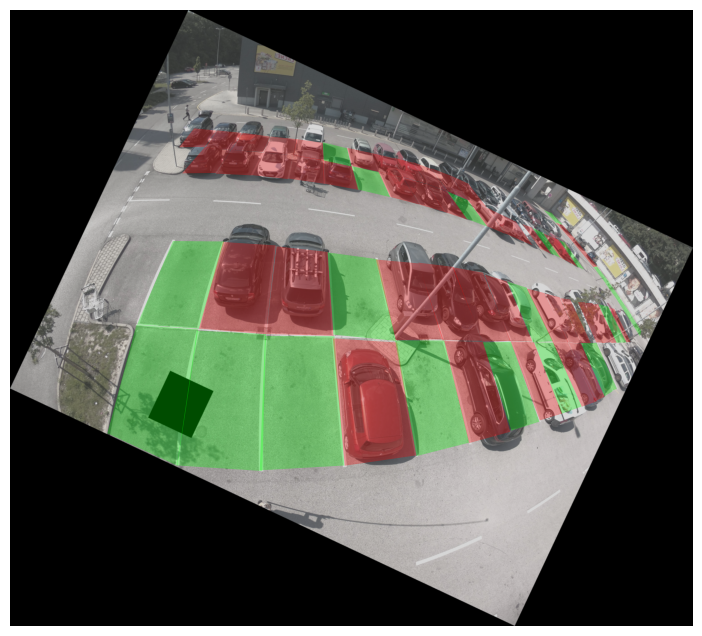

In [9]:
np.random.seed(99)
image_aug, rois_aug = tran.proportional_erase(image_raw, rois) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

## Speckle Noise

- var parameter is customizable

### Before color jitter

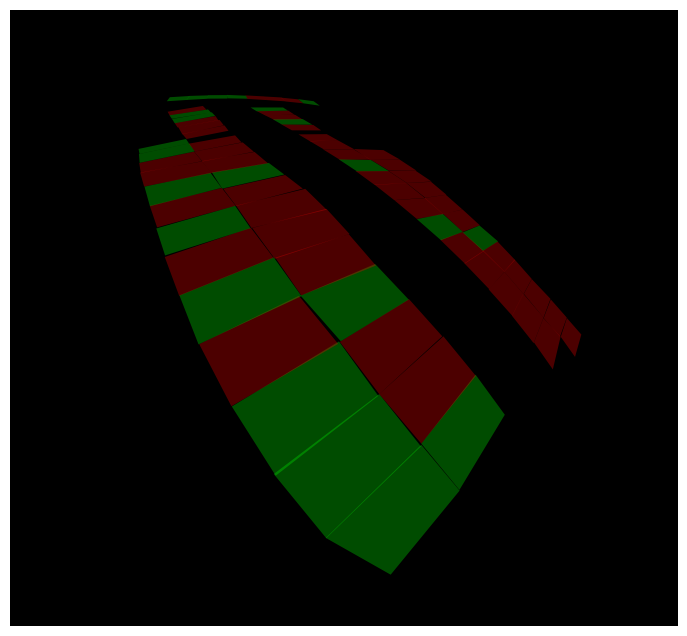

In [10]:
image_aug, rois_aug = tran.speckle_noise_before(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

### After color jitter

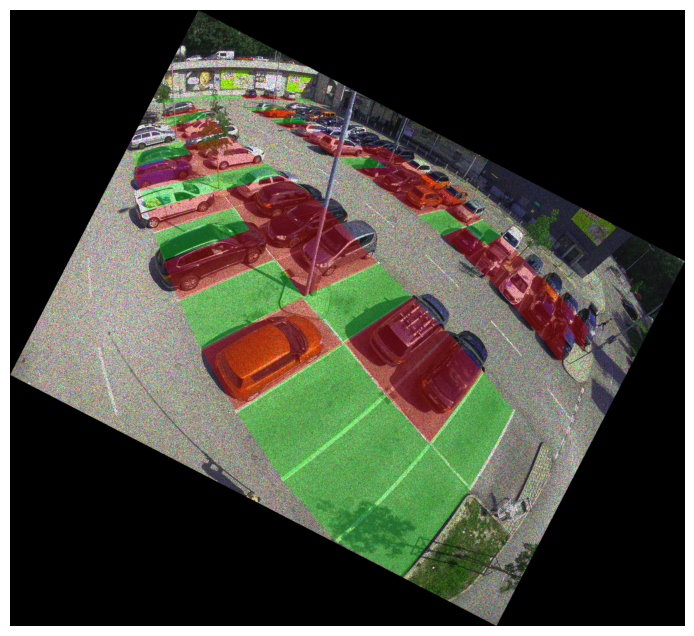

In [11]:
np.random.seed(99)
image_aug, rois_aug = tran.speckle_noise_after(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

## Speckle Erase

- var parameter is customizable

### Random

#### Before color jitter

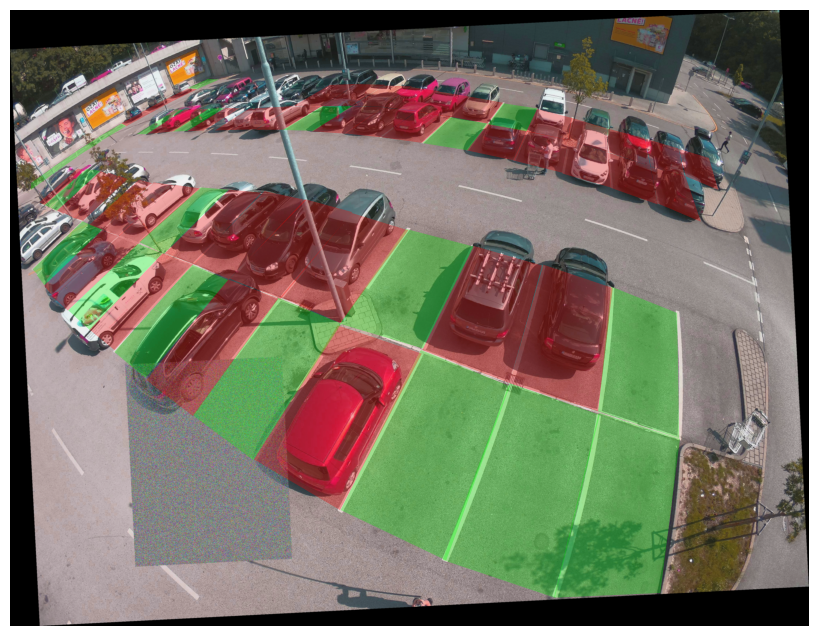

In [12]:
np.random.seed(100)
image_aug, rois_aug = tran.random_speckle_erase_before(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

#### After color jitter

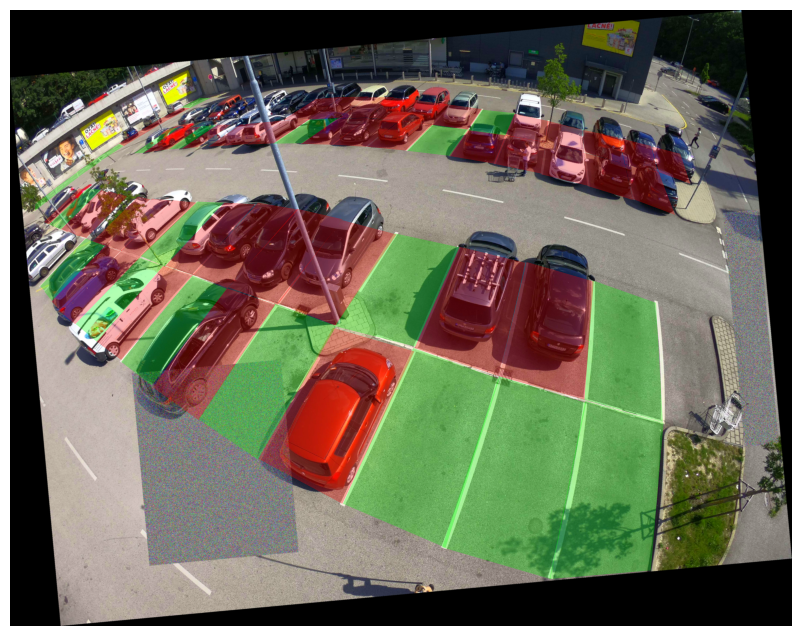

In [13]:
np.random.seed(99)
image_aug, rois_aug = tran.random_speckle_erase_after(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

### Proportional

#### Before color jitter

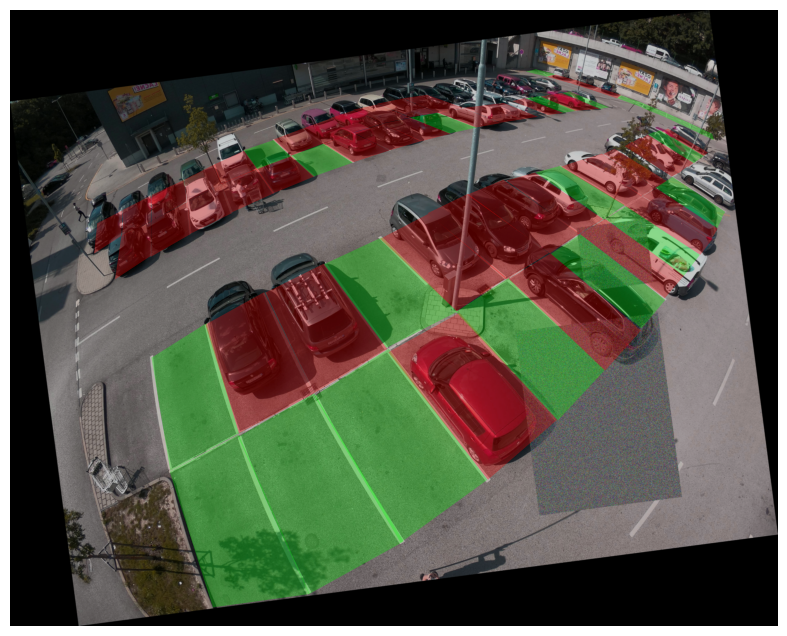

In [14]:
np.random.seed(100)
image_aug, rois_aug = tran.proportional_speckle_erase_before(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image

#### After color jitter

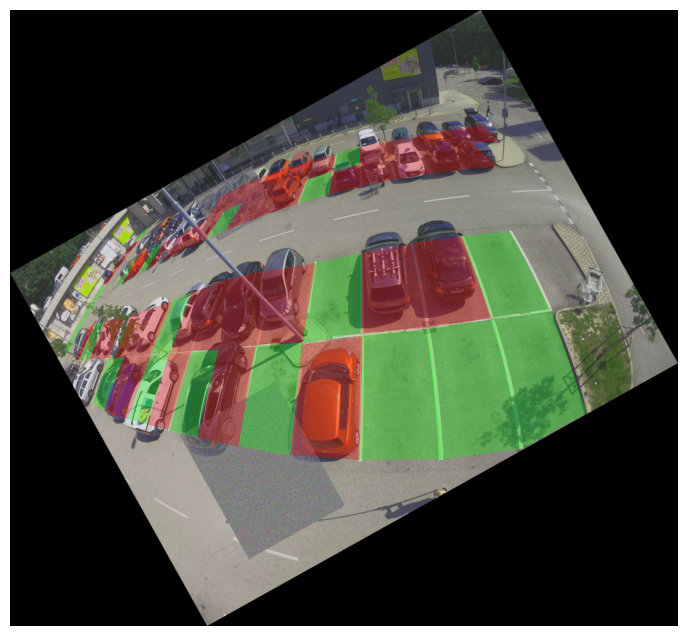

In [15]:
np.random.seed(99)
image_aug, rois_aug = tran.proportional_speckle_erase_after(image_raw, rois, var=1.0) # DATA AUGMENTATION
image_aug = tran.preprocess(image_aug, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image_aug, rois_aug, labels, show=True) #output annotated image